<a href="https://colab.research.google.com/github/alexfferro/Curso_ML/blob/master/Agrupamento%20Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando o Data-set e Funções do SKLearn

In [253]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [255]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

#Análise Inicial

Este é um conjunto de dados que está analisando a qualidade de vinhos vermelhos, sendo que de acordo com os detalhes do repositorio, caso o vinho possua qualidade de 6,5 ou superior é um vinho "bom" caso contrario é um vinho "ruim". Os valores variam entre 0 e 10. O Pode ser encontrado clicando aqui. 


[Red-Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


In [256]:
data.rename(columns={'fixed acidity': 'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

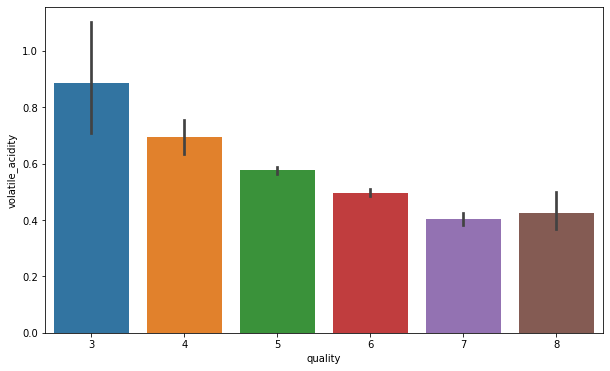

In [257]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = data)

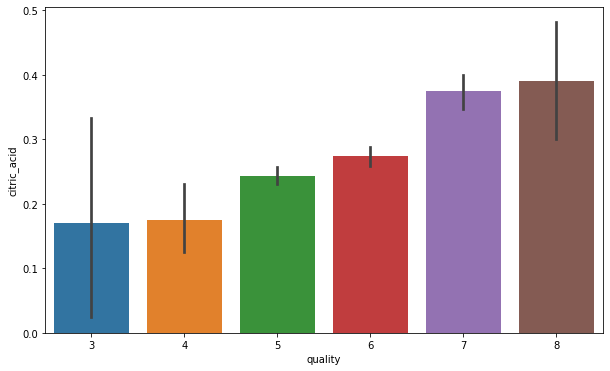

In [258]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = data)

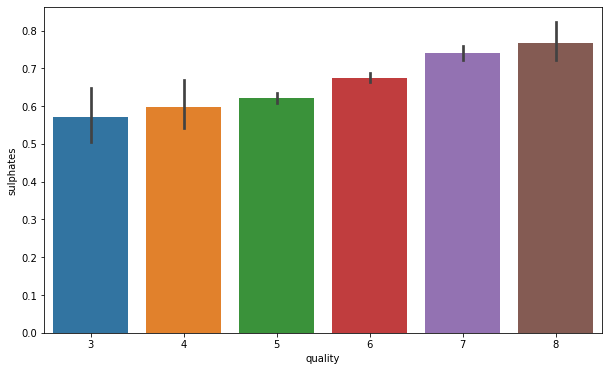

In [259]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

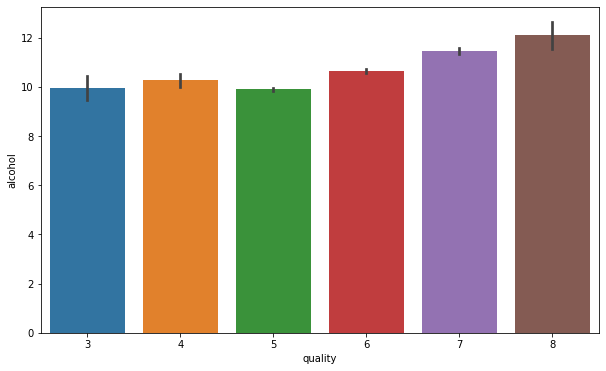

In [260]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

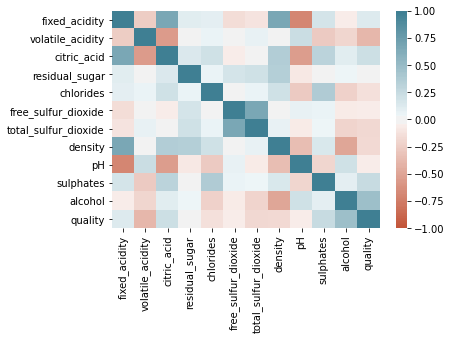

In [261]:
corr = data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

#Pré-Processamento de dados

De acordo com o artigo do dataset, a qualidade dos vinhos podem ser divididas em algumas categorias.
Podemos entender que um vinho que tenha qualidade menor que 6,5 é um vinho ruim, e caso seja maior que 6,5 um bom vinho, se ele for maior que 8 é um vinho excelente. 

Nosso conjunto de dados possuem uma quantidade de vinhos ruins muito maior que os vinhos bons, então iremos apenas assumir que temos um bom vinho se ele superar a qualidade de 6,5.

In [262]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [263]:
label_quality = LabelEncoder()

In [264]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [265]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [266]:
data = (data - data.min())/(data.max()-data.min())

#Modelando os dados

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [268]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [269]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

#Avaliando o Modelo

In [270]:
from sklearn.metrics import adjusted_rand_score

In [271]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.02902524191366794

### Rand_Score
O resultado do rand_score para o modelo deu menor do que zero, significa que o modelo é **ruim**, mesmo alterando a quantidade de interações ou o número de clusters entre outros parametros, o resultado é sempre abaixo de zero.

In [272]:
from sklearn.metrics import adjusted_mutual_info_score

In [273]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

0.01424627864729433

### Mutual Info

A métrica de informação Mutua se saiu melhor que o rand Info, porém o modelo ainda continua muito proximo de zero. Tornando o agrupamento de dados do data-set **ruim**.

In [274]:
from sklearn.metrics import fowlkes_mallows_score

In [275]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5411151485570209

### Fowlkes Mallows

Foi a melhor métrica para avaliar o modelo de agrupamento, apesar do resultado estar longe do valor ideal. Contudo, se comparado com as duas métricas anteriores *Mutual Info e Rand Score* o valor é até relativamente **bom**. 

Visando que estas técnicas podem ser usadas quando conhecemos os rotulos das classes.

In [276]:
from sklearn.metrics import davies_bouldin_score

In [277]:
db = davies_bouldin_score(X,kmeans_labels)
db

0.6671736003519757

In [278]:
from sklearn.metrics import silhouette_score

In [279]:
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.5209776312111326

In [280]:
from sklearn.metrics import calinski_harabasz_score

In [281]:
ch = calinski_harabasz_score(X,kmeans_labels)
ch

3066.1305717150976

### Modelos sem rotulos

Entre as métricas de Davies Bouldin, Coeficiente de Silhueta e Calinski, a métrica de Calinski foi a melhor e a de Coeficiente de Silhueta a pior, em termos de resultados.
* Davies Bouldin — 0.667
* Coeficiente de Silhueta — 0.520
* Calinski Harabasz — 3066.130


# Agrupamento Hierarquico

In [282]:
from sklearn.cluster import AgglomerativeClustering

In [283]:
hierarquico = AgglomerativeClustering(n_clusters=4)
labels_hierarquico = hierarquico.fit(X).labels_

## Avaliando o Modelo

In [285]:
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

-0.023101897258723324

In [286]:
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.01560463374823795

In [287]:
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.4607273903124815

### Interpretando os resultados rotulados.

Se compararmos com o Kmeans, o agrupamento hierarquico foi ligeiramente pior, os resultados estão bem proximos entre eles. dito isto, tanto no Kmeans como no Hierarquico a métrica de Fowlkes Mallows foi melhor.

In [288]:
db = davies_bouldin_score(X,labels_hierarquico)
db

0.7842462626712813

In [289]:
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.41602216937724584

In [290]:
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

2586.426363942889

### Interpretando os não rotulados

Existe uma pequena diferença entre os valores entre o Kmeans e o Hierarquico entre os não rotulados, a metrica de Davies Bouldin é um pouco melhor no Hierarquico do que no Kmeans, e o Coeficiente de Silhueta é pior no Hierarquico do que no Kmeans. Porém, em ambos a métrica de Calinski é a melhor.

* Davies Bouldin — 0.784
* Coeficiente de Silhueta — 0.416
* Calinski Harabasz — 2586.426

# Considerações Finais

O agrupamento de dados feito pelo Kmeans foi melhor que o agrupamento feito pelo Hierarquico, Mas os resultados não foram os ideais. Para um conjunto de dados rotulado como este, a métrica de Fowlkes Mallows deu o melhor resultado no Kmeans sendo o valor de 0.541. Onde quanto mais proximo de 1, melhor é o resultado. 

Quando utilizamos o modelo sem os rotulos, a métrica que se saiu mais promissora foi a de Calinski Harabasz, a escala do resultado foi muito maior que as demais. O Conjunto de dados possui uma discrepância muito grande entre as classes de vinhos "Bons" e "Ruins" e isso pode dificultar o algoritmo em fazer um **bom** agrupamento. Então os resultados até que foram promissores.